In this notebook, we test the sublinear expectation and coherent risk measures.

We will use two set of samples to illustrate the idea, 

1) samples from the normal distributions  
2) samples from the mixture of normal distributions

In [22]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import expon
import matplotlib.pyplot as plt

In [16]:
sample_size = 200 
tau = 0.95

## VaR vs. CVaR

In [23]:
VaR_95 = expon.ppf(0.95, loc = 0, scale = 1)
VaR_95

2.99573227355399

In [24]:
tail_loss = expon.expect(lambda x: x, loc = 0,scale =1, lb = VaR_95)
CVaR_95 = 1/(1-0.95) * tail_loss
CVaR_95

3.99573227355399

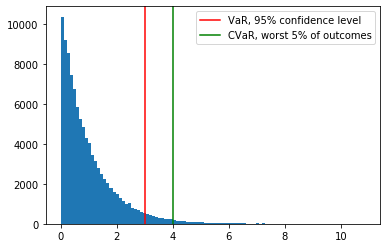

In [25]:
plt.hist(expon.rvs(size = 100000, loc = 0, scale = 1), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

## Empirical VaR vs. CVaR

In [2]:
samples_Gaussian = np.random.normal(loc=0, scale=1, size=200)

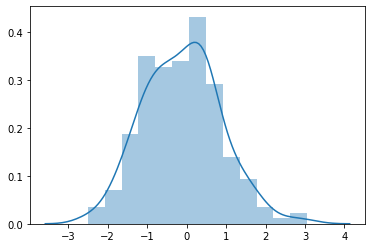

In [6]:
sns.distplot(samples_Gaussian)

In [18]:
emp_VaR_95 = np.sort(samples_Gaussian)[int(sample_size * tau)]
emp_VaR_95

1.5616497426123288

In [19]:
emp_CVaR_95 = np.mean(np.sort(samples_Gaussian)[int(sample_size * tau):])
emp_CVaR_95

2.0331161208104964

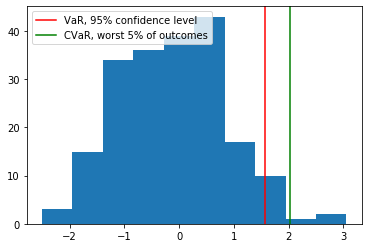

In [20]:
plt.hist(samples_Gaussian)
plt.axvline(x = emp_VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = emp_CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()